In [2]:
import pandas as pd
import seaborn as sns 
import numpy as np

In [3]:
df=sns.load_dataset('iris')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
X=df.drop('species',axis=1)

In [6]:
y=df['species']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [10]:
from sklearn.decomposition import PCA

In [13]:
#PCA transformation
pca=PCA(n_components=3)

In [16]:
X_train=pca.fit_transform(X_train)
X_train

array([[ 3.22902397e-01, -2.37270677e-01,  5.67385995e-02],
       [ 3.35552035e+00,  5.83049683e-01, -3.28026023e-01],
       [ 6.06909989e-01, -3.15971948e-01,  3.00676488e-01],
       [-2.72817511e+00,  4.27577132e-01,  1.15313718e-03],
       [ 3.45649511e+00,  5.05276379e-01, -5.58623842e-01],
       [ 1.81648425e-01, -2.53524117e-01, -2.95111131e-01],
       [-2.68432386e+00,  4.26081277e-01, -1.16106065e-01],
       [-2.81519461e+00,  3.65984714e-01,  1.04618538e-01],
       [-2.24998893e+00,  5.19074070e-01,  3.29384000e-01],
       [-5.78277826e-01, -1.17473663e+00, -3.43091299e-01],
       [ 1.33493144e+00, -1.58668543e-01, -7.85684488e-02],
       [-2.40366776e+00,  5.99469498e-02,  1.25799777e-01],
       [-2.55890034e+00, -2.63787007e-02, -2.52131368e-01],
       [-2.35087676e+00,  1.95931613e-01,  5.58985862e-02],
       [ 2.99984039e-01, -4.44823406e-01, -1.67008263e-02],
       [-2.63556736e+00,  3.39217011e-01, -5.69862980e-02],
       [ 2.80440519e-01, -1.55505144e-01

In [17]:
pca.components_

array([[ 0.36873621, -0.06977632,  0.85630117,  0.35484246],
       [ 0.68187006,  0.69682861, -0.1867726 , -0.12082672],
       [-0.53692993,  0.63566209,  0.05426774,  0.55199182]])

In [19]:
# variances captured by each pca_vector 
pca.explained_variance_ratio_

array([0.9201008 , 0.05494812, 0.01978256])

In [20]:
variance=pca.explained_variance_ratio_

In [22]:
# variances captured out of the entire dataset
sum(variance)

0.9948314797232243

In [62]:
import matplotlib.pyplot as plt

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

In [63]:
pca_df = pd.DataFrame(data=X_train, columns=['PC1', 'PC2', 'PC3'])
pca_df['Target'] = df['species']

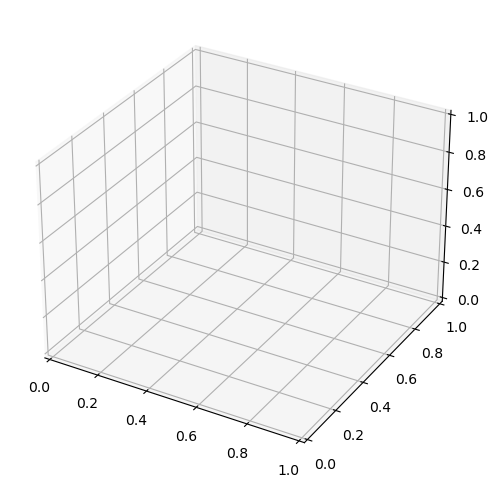

In [64]:
 
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ValueError: 'c' argument has 1 elements, which is inconsistent with 'x' and 'y' with size 0.

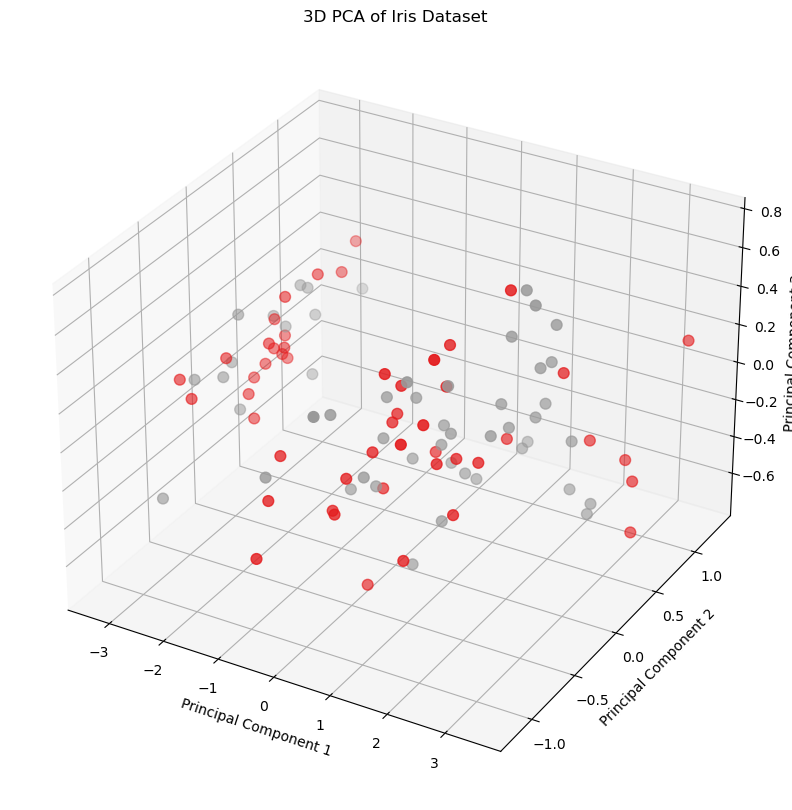

In [68]:
# Define the mapping from categorical labels to numerical values
target_mapping = {'setosa': 0, 'versicolor': 1, 'virginica': 2}

# Apply the mapping to convert the 'Target' column to numerical values
pca_df['Target_numeric'] = pca_df['Target'].map(target_mapping)




fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Use scatter plot for the three principal components
scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], 
                     c=pca_df['Target_numeric'], cmap='Set1', s=60)

# Add axis labels
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('3D PCA of Iris Dataset')

# Manually define the legend labels for all categories
legend_labels = ['setosa', 'versicolor', 'virginica']
# Add dummy points to ensure all legend labels are shown
dummy_points = [0, 1, 2]
for label in dummy_points:
    ax.scatter([], [], [], c=[label], label=legend_labels[label], cmap='Set1')

# Create a legend using the custom labels and numerical values for categories
ax.legend(title="Target Categories")

# Show plot
plt.show()


